<a href="https://colab.research.google.com/github/shannonshih/Tibame_GAD245-Practice-HW_0121/blob/main/05_01_LAB_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 05-01.LAB_Iris_學號_姓名  (例: "05-01.LAB_Iris_00_陳仁政")
* 附件檔名請設定為： 05-01.LAB_Iris_學號_姓名.ipynb (例: "05-01.LAB_Iris_00_陳仁政.ipynb")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv("/content/drive/MyDrive/AI人才應用/20250109T010859Z-001/2024-12 AI數據應用人才養成班/data/Iris.csv")
data.head(10)
# penguins = sns.load_dataset("penguins")
# penguins.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


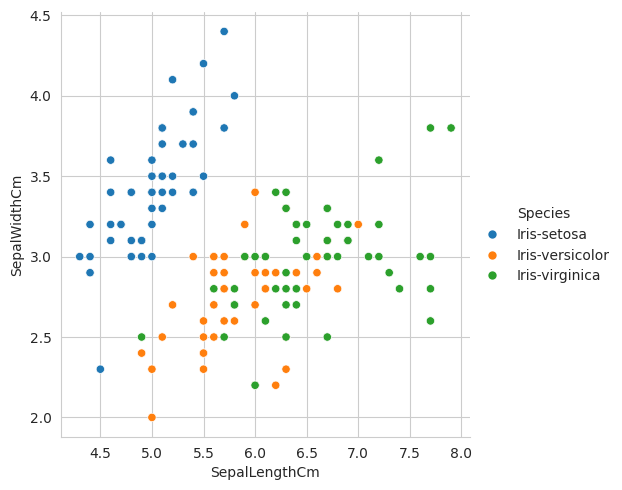

In [6]:
# 根據 SepalLengthCm 與 SepalWidthCm 兩個欄位來畫出 三種不同種類花的資料點分布圖

sns.relplot(data=data, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

### ↑ 問題：從上圖可以看出什麼關係？

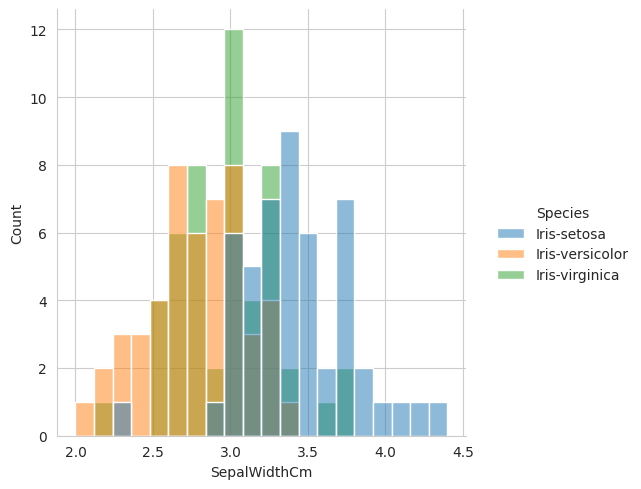

In [12]:
# 畫出 SepalWidthCm 的直方圖，並分成三類
sns.displot(data, x="SepalWidthCm", bins=20, hue="Species")

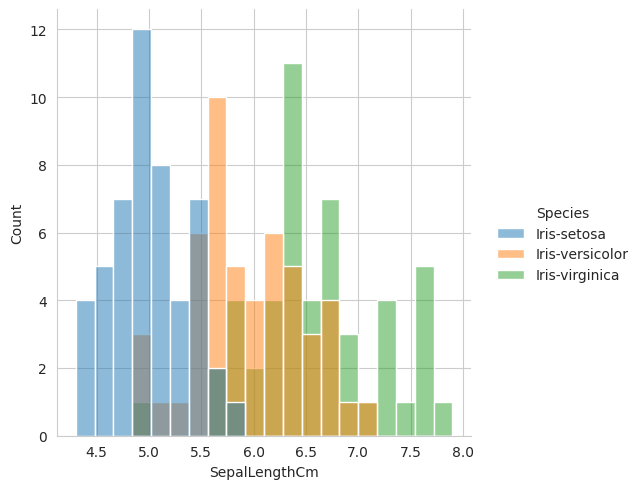

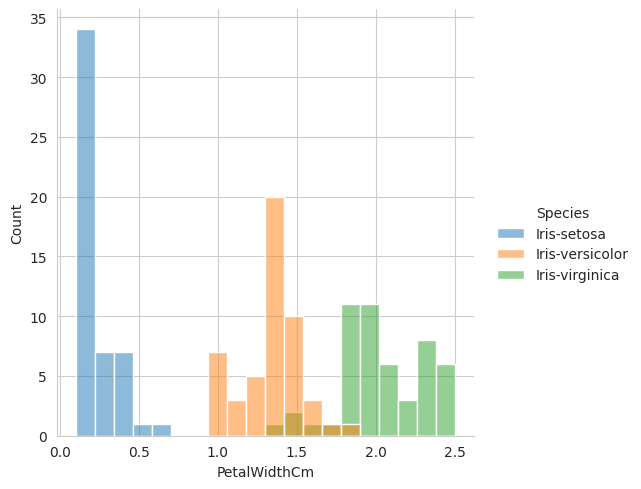

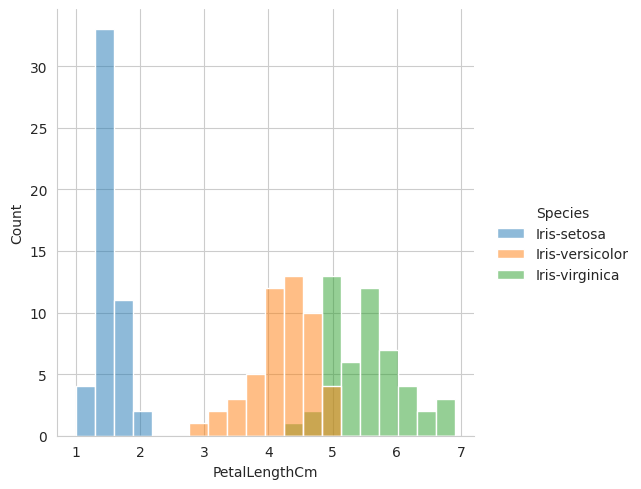

In [17]:
# 練習題
# 根據上圖看看其他三個欄位的直方圖分布
# 並說明那些欄位比較容易進行分類

sns.displot(data, x="SepalLengthCm", bins=20, hue="Species")
sns.displot(data, x="PetalWidthCm", bins=20, hue="Species")
sns.displot(data, x="PetalLengthCm", bins=20, hue="Species")



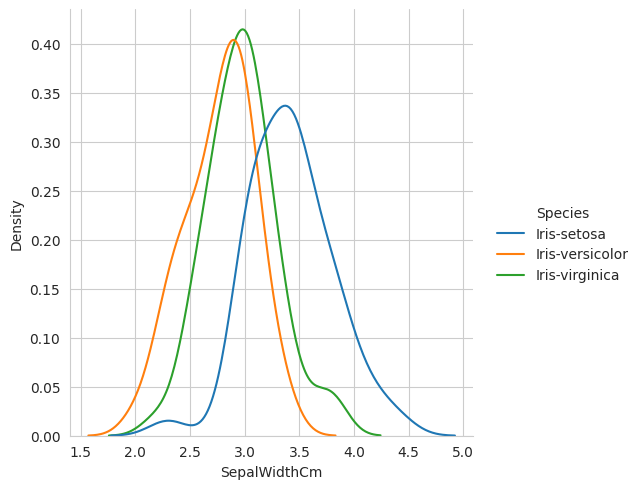

In [14]:
# 畫出 SepalWidthCm 的KDE圖，並分成三類
sns.displot(data, x="SepalWidthCm", hue="Species", kind="kde")

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

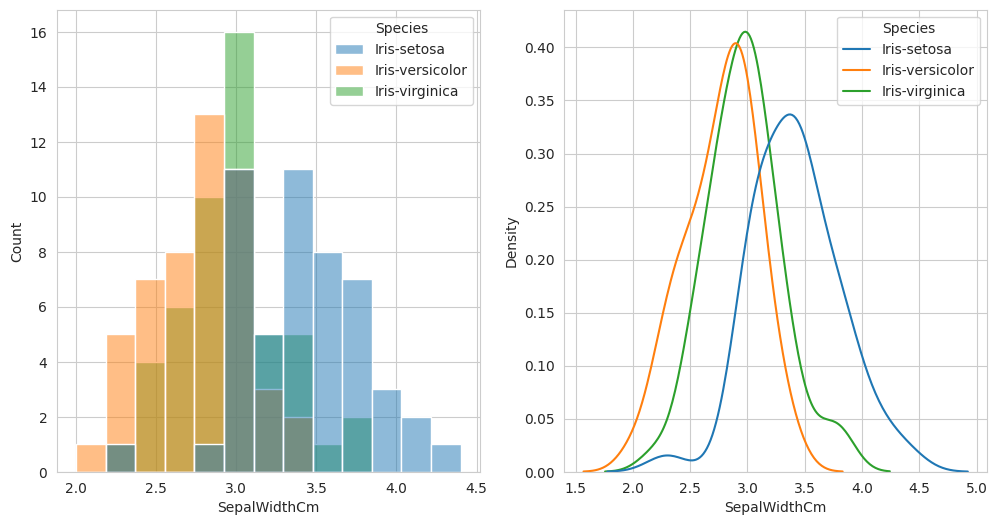

In [16]:
# 同時顯示直方圖與KDE圖
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data, x="SepalWidthCm", hue="Species", ax=axes[0])
sns.kdeplot(data, x="SepalWidthCm", hue="Species", ax=axes[1])

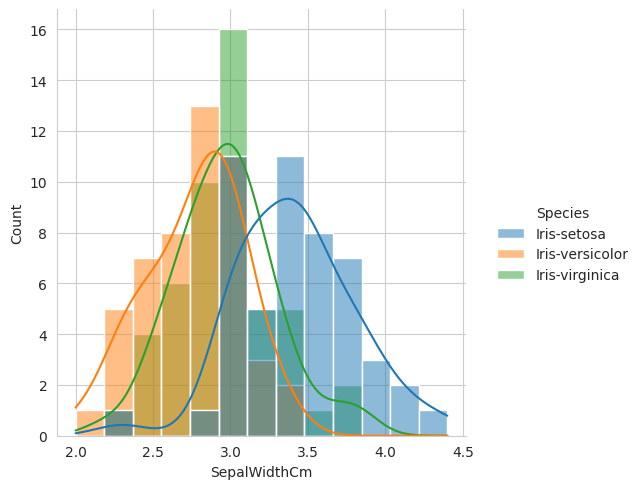

In [24]:
sns.displot(data, x="SepalWidthCm", hue="Species", kde=True)

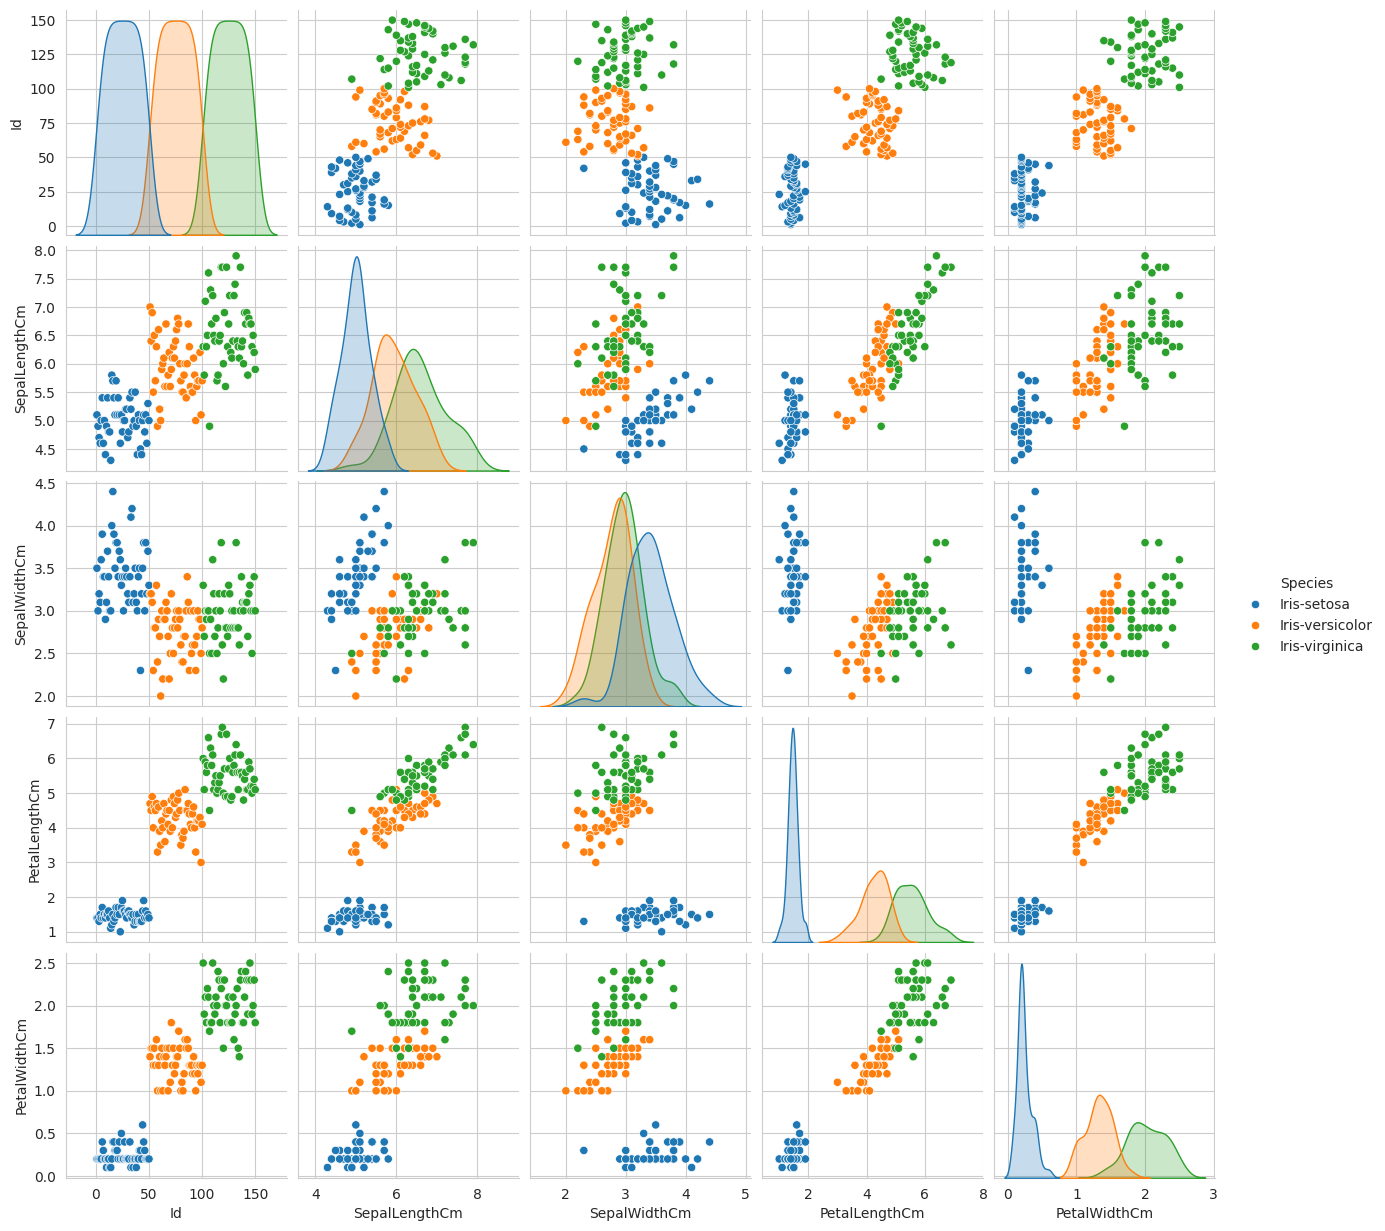

In [26]:
# 使用 Pairplot來畫出散布圖矩陣
sns.pairplot(data, hue="Species")

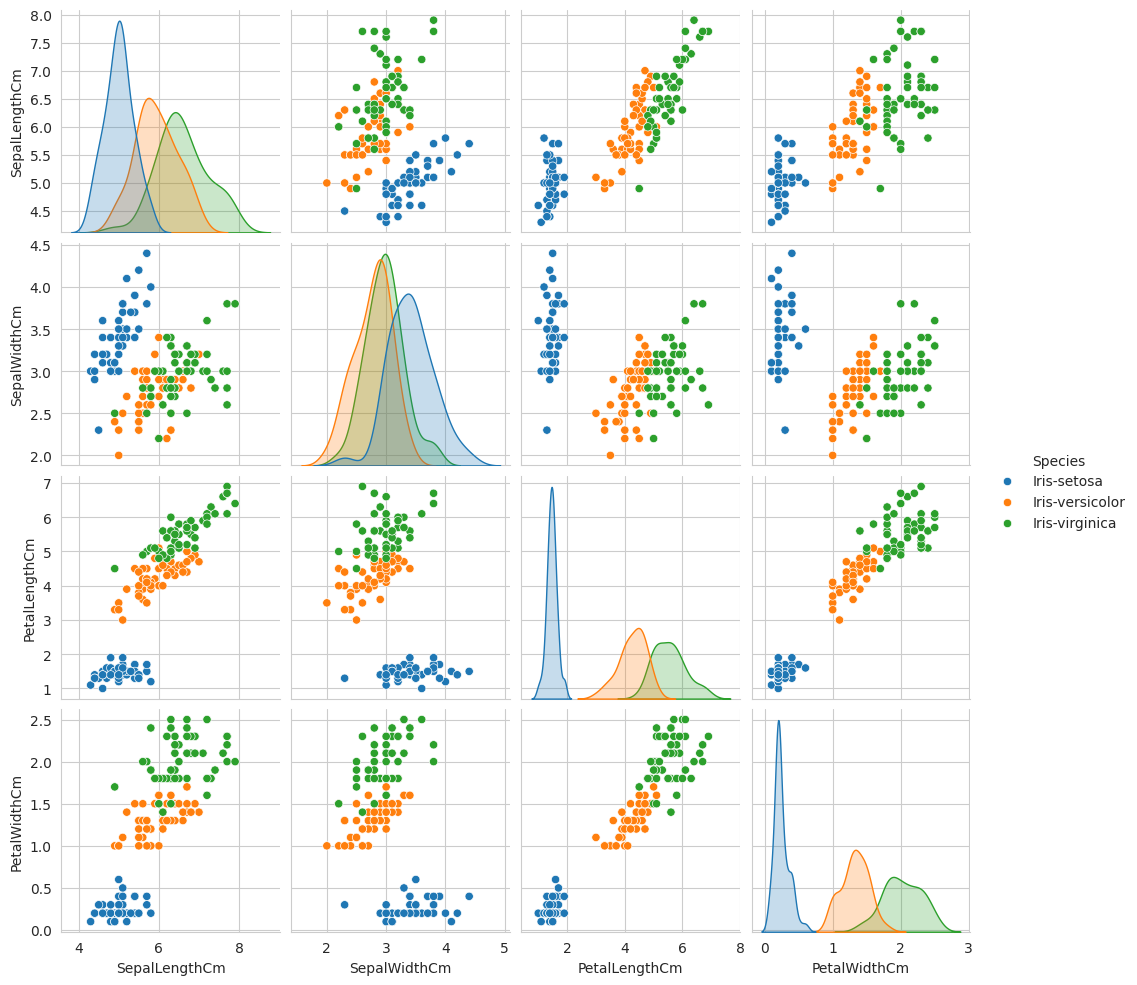

In [34]:
sns.pairplot(data=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']], hue="Species")

### ↑ 問題：從上圖可以看出什麼關係？

In [36]:
#計算四個欄位的相關性係數矩陣
data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


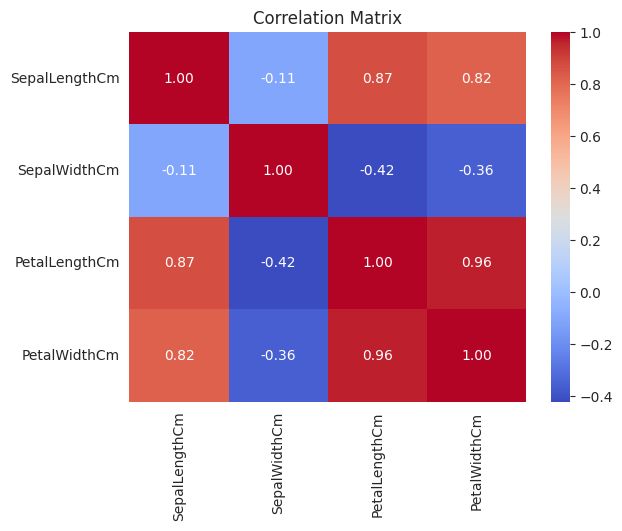

In [37]:
corr_matrix = data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [43]:
# 判斷 如果Species為Iris-setosa, value為1; 反之為0
data["is_setosa"] = (data["Species"] == "Iris-setosa").astype("int64")

,is_setosa
0,1
1,1
2,1
3,1
4,1
...,...
145,0
146,0
147,0
148,0


In [41]:
# 在原始資料新增一個欄位"is_setosa"
data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "is_setosa"]].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,is_setosa
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,-0.717416
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,0.595601
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,-0.922688
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,-0.887510
is_setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000


### ↑ 問題：從上圖可以看出什麼關係？